# Logistic Regression


## Table of Contents:
1. [Background reading](#background-reading)
2. [Dataset](#dataset)
3. [Essence of Data](#essence-of-data)
    
    3.1 [Examples of application](#examples-of-application)
    
    3.2 [Example Codes](#example-codes)
        

## Background reading:

**Suggested Reading**:

*Intro to Statistical Learning*: 4.3 Logistic Regression, 4.3.4 Multiple Logistic Regression

*Ethical Algorithm*: Chapter 3, Games People Play, The Dating Game, (Page 94-97)

**Optional Reading**:

*Intro to Statistical Learning*: 4.3.5 Multinomial Logistic Regression, 4.4.2 Linear Discriminant Analysis (explains specification, specificity, and ROC curve)

## Dataset:
The example on github uses the social network advertising clicks database from kaggle
Link: https://www.kaggle.com/jahnveenarang/cvdcvd-vd?select=Social_Network_Ads.csv 

Attribute columns:
1. User ID
2. Gender - male or female
3. Age
4. Estimated Salary
5. Gender Binary (Male = 1 and Female = 0)
6. Purchased (User clicked on the ad and purchased = 1, user did not click on the ad = 0)

The class being used for our target prediction class is “Purchased” 


## Essence of Data:

**What is logistic regression?**
Logistic regression is a supervised machine learning algorithm that is used for classification.

There are two types of logistic regression
Binary logistic regression (ie. patient has diabetes or patient does not have diabetes)
Multiple logistic regression (ie. freshman, sophomore, junior, senior)

**How does logistic regression work?**
Article: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

The predicted Y value lies within the range of 0 and 1.
If we have two possible class values then we must set a threshold value, where all values above this threshold are assigned to one class and all values below the threshold to the other class. Typically we would choose a value of 0.5. Any unique user ID with a probability below 0.5 will be assigned to whichever class is 0 and any unique user ID with a probability above 0.5 will be assigned a class value of 1.

The equation that logistic regression classifier uses when there are multiple predictors and a set of binary classifications. The sigmoid function is used to map predictions from probabilities.

Graph here shows the shape of **sigmoid function**
*The function of sigmoid: $S(x) = \frac{1}{1+e^{-x}}$*


![](fig1.png)
<div align = 'center'><font size = '5'>$\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X}$</font></div>

<div align = 'center'><font size = '5'>$\log\frac{p(X)}{1-p(X)}=\beta_0+\beta_1X$</font></div>

<div align = 'center'><font size = '5'>$p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$</font></div>

<div align = 'center'><font size = '5'>$\log\frac{p(X)}{1-p(X)}=\beta_0+\beta_1X_1+...+\beta_pX_p$</font></div>

<div align = 'center'><font size = '5'>$p(X) = \frac{e^{\beta_0+\beta_1X_1+...+\beta_pX_p}}{1+e^{\beta_0+\beta_1X_1+...+\beta_pX_p}}$</font></div>




### Examples of application?
**Article:** 

https://www.forbes.com/sites/forbesbusinesscouncil/2022/01/18/how-machine-learning-is-shaping-the-future-of-advertising/?sh=7bf8d1f51361 

**Article about possible targeted ads being used to discriminate against disabled people and minorities in housing and political candidates using “dark ads” to target groups:**

https://www.ama.org/marketing-news/the-ethics-of-targeting-minorities-with-dark-ads/
https://hbr.org/2019/11/how-targeted-ads-and-dynamic-pricing-can-perpetuate-bias 

Logistic regression can be used to predict disease survival prediction, natural language processing tasks, sentiment analysis, and fraudulent transactions. It is commonly for targeted advertising by e-commerce retailers, political marketing campaigns, banks/credit card companies, and advertising companies.
Possible ethical issues include targeting by exclusion and “dark ads”
What groups (age, gender, income, education level) should these companies show advertisements towards in order to increase sales and support?

This ties back to exploration vs. exploitation. When it comes to advertising a company does not want to spend money on ads for groups who are not already designated as good “target groups” (typically done through market research). They will want to exploit what they already know about groups who are likely to become customers and target their advertisements towards these groups in order to drive sales.


### Example Codes

In [15]:
import pandas as pd
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Load the dataset and columns of interest
#addataset = '../../../data/SocialNetworkAdClicks.csv'
addataset = 'SocialNetworkAdClicks.csv'
df_addataset = pd.read_csv(addataset, usecols = ['User ID','Age','EstimatedSalary','GenderBinary','Purchased'])

In [3]:
#checking dataset for null values
df_addataset.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
GenderBinary       0
dtype: int64

In [5]:
#dataset descriptive statistics
df_addataset.head()

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [17]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Age' and 'EstimatedSalary' columns
df_addataset[['Age', 'EstimatedSalary']] = scaler.fit_transform(df_addataset[['Age', 'EstimatedSalary']])

df_addataset.head()

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
0,15624510,0.023810,0.029630,0,1
1,15810944,0.404762,0.037037,0,1
2,15668575,0.190476,0.207407,0,0
3,15603246,0.214286,0.311111,0,0
4,15804002,0.023810,0.451852,0,1


In [ ]:
#identify which columns are our predictors and which is our target 
feature_cols= [ 'GenderBinary','Age','EstimatedSalary']
predictors = df_addataset[feature_cols]
target = df_addataset.Purchased

In [19]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.2)

In [20]:
#initiate logistic regression model
logreg = LogisticRegression()
#fit the model to the training data
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [21]:
#check accuracy and ROC score of the model
accuracy = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy))

Accuracy of the Logistic Regression Model: 80.0%


## ROC Curve (Receiver Operating Characteristic Curve)

ROC Curve is a graphical tool used to evaluate the performance of a binary classification model. It shows the trade-off between the model's **True Positive Rate (TPR)** (recall) and **False Positive Rate (FPR)** across different thresholds.

### Key Concepts of ROC Curve

1. **True Positive Rate (TPR)**: The proportion of actual positive samples that are correctly identified by the model. The formula is:

   $$
   \text{TPR} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
   $$

2. **False Positive Rate (FPR)**: The proportion of actual negative samples that are incorrectly identified as positive by the model. The formula is:

   $$
   \text{FPR} = \frac{\text{False Positives (FP)}}{\text{False Positives (FP)} + \text{True Negatives (TN)}}
   $$

3. **ROC Curve**: A plot with False Positive Rate (FPR) on the x-axis and True Positive Rate (TPR) on the y-axis. By changing the classification threshold, we get a series of FPR and TPR pairs to plot the ROC curve.

### Purpose of ROC Curve

- **Evaluate Model Performance**: The ROC curve is used to compare the classification performance of different models. The closer the curve follows the top-left corner, the better the model's performance.

- **Choose the Optimal Threshold**: The ROC curve can help select the best classification threshold to balance sensitivity and specificity based on the specific needs of the application.

### AUC (Area Under the Curve)

- **AUC**: The area under the ROC curve. It quantifies the overall performance of the model. The AUC value ranges from 0 to 1, with a larger value indicating better model performance. An AUC of 0.5 suggests the model has no discriminatory ability (equivalent to random guessing), while an AUC of 1 indicates perfect discrimination.

### Conclusion

ROC curve and AUC are important tools for evaluating the performance of binary classification models. They help us understand the model's prediction ability and performance across different thresholds. These tools are particularly useful because they are insensitive to class imbalance and provide a comprehensive performance measure.

In [ ]:
#create ROC Curve
# If you are confused with ROC Curve, go below to see the concept
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [24]:
# ROC Area Under the Curve
roc = metrics.roc_auc_score(y_test,y_pred)*100
print('Area Under the curve accuracy score is: {0}%'.format(roc))

Area Under the curve accuracy score is: 75.33333333333333%


In [25]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[47,  3],
       [13, 17]])

Text(0.5, 427.9555555555555, 'Predicted Class')

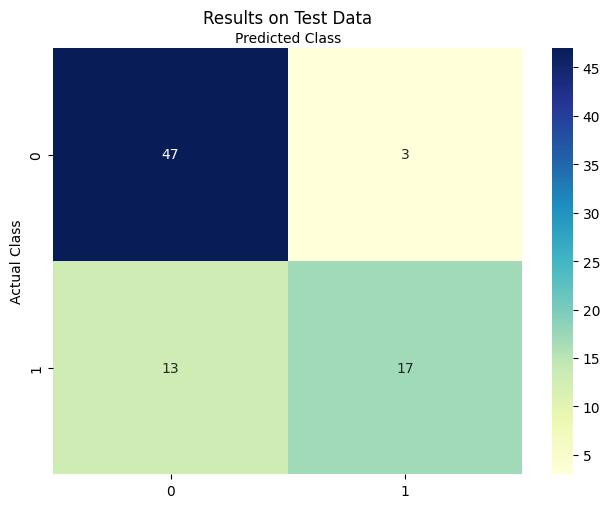

In [26]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')